In [1]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from collections import Counter
from matplotlib import pyplot as plt

In [2]:
import pandas as pd
data = pd.read_csv('train.csv', parse_dates=['pickup_datetime', 'dropoff_datetime'])

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null datetime64[ns]
dropoff_datetime      1458644 non-null datetime64[ns]
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


In [4]:
tocluster = data[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']].values

In [18]:
scores = []
for k in range(3, 16):
    print("Current K is", k)
    kmeans = KMeans(n_clusters=k, random_state=10)
    labels = kmeans.fit(tocluster).labels_
    scores.append(silhouette_score(tocluster, labels, metric='euclidean', sample_size=1000))

Current K is 3
Current K is 4
Current K is 5
Current K is 6
Current K is 7
Current K is 8
Current K is 9
Current K is 10
Current K is 11
Current K is 12
Current K is 13
Current K is 14
Current K is 15


In [21]:
plt.plot(range(3,16), scores)

In [23]:
plt.show()

In [24]:
kmeans = KMeans(n_clusters=8, random_state=10)

In [25]:
cluster_labels = kmeans.fit(tocluster).labels_

In [26]:
Counter(cluster_labels)

Counter({0: 391099,
         1: 2,
         2: 608212,
         3: 18,
         4: 378264,
         5: 47591,
         6: 33453,
         7: 5})

In [51]:
plt.plot(data.loc[cluster_labels==7,'pickup_latitude'], data.loc[cluster_labels==7,'pickup_longitude'],'or')
plt.plot(data.loc[cluster_labels==7,'dropoff_latitude'], data.loc[cluster_labels==7,'dropoff_longitude'],'xb')

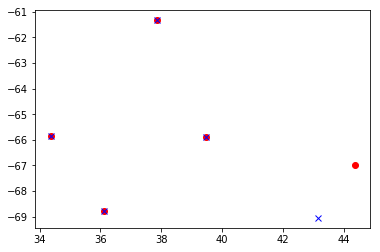

In [52]:
plt.show()

In [94]:
cl = 2
data.loc[cluster_labels==cl,'trip_duration'].mean(), data.loc[cluster_labels==cl,'trip_duration'].std(),data.loc[cluster_labels==cl,'trip_duration'].median()

(863.1020400781307, 3140.9705111719563, 643.0)

In [97]:
plt.hist(data.loc[cluster_labels==cl,'trip_duration'])

(array([  6.07355000e+05,   1.50000000e+01,   6.00000000e+00,
          7.00000000e+00,   7.00000000e+00,   3.00000000e+00,
          5.00000000e+00,   6.00000000e+00,   6.00000000e+00,
          8.02000000e+02]),
 array([  1.00000000e+00,   8.63990000e+03,   1.72788000e+04,
          2.59177000e+04,   3.45566000e+04,   4.31955000e+04,
          5.18344000e+04,   6.04733000e+04,   6.91122000e+04,
          7.77511000e+04,   8.63900000e+04]),
 <a list of 10 Patch objects>)

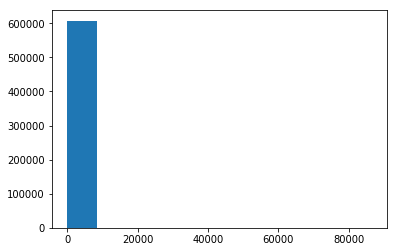

In [98]:
plt.show()

In [105]:
data.loc[cluster_labels==cl,'trip_duration'].quantile(0.99)

2328.0

In [120]:
sum(data.loc[cluster_labels==1,'trip_duration']>86000)

0

In [128]:
data.loc[cluster_labels==7,'trip_duration'].median()

385.0

In [119]:
data.trip_duration.quantile(0.99999)

86369.0